In [1]:
import os
import importlib  # used to reload modules if necessary
path_to_frontend = '..'
os.chdir(path_to_frontend)
import q100viz.session as session
import q100viz.devtools as devtools
import q100viz.graphics.graphs as graphs

pygame 2.1.2 (SDL 2.0.16, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


Exception in thread Thread-5 (run):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dunland/github/qScope/qScope_frontend/q100viz/api.py", line 16, in run
    self.io.connect(socket_addr)
  File "/home/dunland/.local/lib/python3.10/site-packages/socketio/client.py", line 338, in connect
    raise exceptions.ConnectionError(exc.args[0]) from None
socketio.exceptions.ConnectionError: HTTPConnectionPool(host='localhost', port=8081): Max retries exceeded with url: /socket.io/?transport=polling&EIO=4&t=1666882834.6386747 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f7ef1769660>: Failed to establish a new connection: [Errno 111] Connection refused'))


loading src_points: [[-3.700000000000001, 5.700000000000003], [-2.7000000000000033, 140.60000000000008], [117.69999999999996, 137.8], [117.39999999999998, 1.5000000000000013]]
loading dst_points: [[80, 45], [80, 1035], [1840, 1035], [1840, 45]]


/home/dunland/github/qScope/qScope_frontend/q100viz/buildings.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bestand = bestand.drop('Kataster_S', 1)
/home/dunland/github/qScope/qScope_frontend/q100viz/buildings.py:38: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bestand = bestand.drop('Kataster_H', 1)


In [ ]:
session.buildings.df['selected'] = False
session.buildings.df['group'] = -1

In [ ]:
# prepare simulation:
# session.VERBOSE_MODE = False
# importlib.reload(devtools)

devtools.select_buildings_for_simulation(session.buildings.df, ['1.02', '5.11', '6.06', '2.07', '2.11', '7.14', '7.20'], connection_to_heat_grid=2027, refurbished=True)
# devtools.select_buildings_for_simulation(session.buildings.df, ['5.11'])
# devtools.select_random_buildings_for_simulation(session.buildings.df, 2, connection_to_heat_grid=2028, refurbished=True)
print(session.buildings.df[session.buildings.df['selected'] == True].index)

In [ ]:
# test batch-simulation:
session.VERBOSE_MODE = True
importlib.reload(graphs)
# 1. 2 specific + 2 random buildings, no decisions
devtools.select_buildings_for_simulation(session.buildings.df, ['5.11', '6.06'])
devtools.select_random_buildings_for_simulation(
            session.buildings.df, 2)
session.simulation.activate(input_max_year=2022)

# 2. same buildings, connection=2022
devtools.select_random_buildings_for_simulation(
            session.buildings.df[session.buildings.df['selected'] == True], 4, connection_to_heat_grid=2021)
session.simulation.activate(input_max_year=2022)

# 2. same buildings, connection=2022 + refurbished
devtools.select_random_buildings_for_simulation(
            session.buildings.df[session.buildings.df['selected'] == True], 4, connection_to_heat_grid=2021, refurbished=True)
session.simulation.activate(input_max_year=2022)

# 2. same buildings, connection=2022 + save_energy
session.buildings.df['refurbished'] = False  # reset refurbishment

devtools.select_random_buildings_for_simulation(
            session.buildings.df[session.buildings.df['selected'] == True], 4, connection_to_heat_grid=2021, save_energy=True)
session.simulation.activate(input_max_year=2022)

In [ ]:
# start simulation:
importlib.reload(graphs)
devtools.select_random_buildings_for_simulation(session.buildings.df, 4, connection_to_heat_grid=2021, refurbished=True)
session.simulation.activate(input_max_year=2045)

In [17]:
########## individual buildings graphs ########
importlib.reload(graphs)
output_folder = "/home/dunland/github/qScope/data/outputs/"
output_folders = [output_folder + "output_20221025_16-18-25", output_folder + "output_20221025_16-24-57", output_folder + "output_20221025_16-31-39", output_folder + "output_20221025_16-38-28", output_folder + "output_20221025_16-44-58", output_folder + "output_20221025_16-55-23", output_folder + "output_20221025_17-01-49", output_folder + "output_20221025_17-08-30", output_folder + "output_20221025_17-15-05", output_folder + "output_20221025_17-21-58", output_folder + "output_20221025_17-29-54", output_folder + "output_20221025_17-37-23"] 
print(output_folders)
print(os.getcwd())

['/home/dunland/github/qScope/data/outputs/output_20221025_16-18-25', '/home/dunland/github/qScope/data/outputs/output_20221025_16-24-57', '/home/dunland/github/qScope/data/outputs/output_20221025_16-31-39', '/home/dunland/github/qScope/data/outputs/output_20221025_16-38-28', '/home/dunland/github/qScope/data/outputs/output_20221025_16-44-58', '/home/dunland/github/qScope/data/outputs/output_20221025_16-55-23', '/home/dunland/github/qScope/data/outputs/output_20221025_17-01-49', '/home/dunland/github/qScope/data/outputs/output_20221025_17-08-30', '/home/dunland/github/qScope/data/outputs/output_20221025_17-15-05', '/home/dunland/github/qScope/data/outputs/output_20221025_17-21-58', '/home/dunland/github/qScope/data/outputs/output_20221025_17-29-54', '/home/dunland/github/qScope/data/outputs/output_20221025_17-37-23']
/home/dunland/github/qScope/qScope_frontend


In [7]:
session.buildings.df[session.buildings.df['spec_heat_consumption'] ==session.buildings.df['spec_heat_consumption'].max()]  # returns 4.23
session.buildings.df[session.buildings.df['spec_heat_consumption'] ==session.buildings.df['spec_heat_consumption'].min()]  # 7.38

,geometry,spec_heat_consumption,spec_power_consumption,energy_source,type,address,avg_spec_heat_consumption,avg_spec_power_consumption,cluster_size,emissions_graphs,...,connection_to_heat_grid,connection_to_heat_grid_prior,refurbished,refurbished_prior,save_energy,save_energy_prior,cell,selected,group,target_point
id,,,,,,,,,,,,,,,,,,,,,
7.38,"POLYGON ((1013328.579 7206628.286, 1013326.853...",20.70261,10.44262,Gas,MFH,Rüsdorfer Straße 8 c,34.94604,11.26675,3,../data/precomputed/simulation_defaults/emissi...,...,False,False,False,False,False,False,,False,-1,POINT (875.1574062137253 546.3598355378001)


In [8]:
devtools.select_buildings_for_simulation(session.buildings.df, ['7.38', '4.23'])
devtools.select_random_buildings_for_simulation(session.buildings.df, 2, connection_to_heat_grid=2022)

In [10]:
session.buildings.df[session.buildings.df['selected'] == True]

,geometry,spec_heat_consumption,spec_power_consumption,energy_source,type,address,avg_spec_heat_consumption,avg_spec_power_consumption,cluster_size,emissions_graphs,...,connection_to_heat_grid,connection_to_heat_grid_prior,refurbished,refurbished_prior,save_energy,save_energy_prior,cell,selected,group,target_point
id,,,,,,,,,,,,,,,,,,,,,
6.01,"POLYGON ((1013574.405 7207045.420, 1013568.394...",170.00000,21.54363,Gas,MFH,Hans-Böckler-Straße 14,166.381845,21.019058,24.0,../data/precomputed/simulation_defaults/emissi...,...,2022.0,False,False,False,False,False,,True,1.0,POINT (480.60268902726045 118.51465494327059)
6.09,"POLYGON ((1013820.243 7206599.689, 1013815.457...",171.49743,33.36128,Gas,MFH,Hans-Böckler-Straße 30,174.687068,34.119666,24.0,../data/precomputed/simulation_defaults/emissi...,...,2022.0,False,False,False,False,False,,True,0.0,POINT (1034.8036047184526 31.435477793258116)
4.23,"POLYGON ((1013681.896 7206690.580, 1013677.020...",640.16619,78.66184,Gas,EFH,Neue Heimat 22,586.602200,63.268995,2.0,../data/precomputed/simulation_defaults/emissi...,...,False,False,False,False,False,False,,True,1.0,POINT (889.1073284150609 164.3637709318831)
7.38,"POLYGON ((1013328.579 7206628.286, 1013326.853...",20.70261,10.44262,Gas,MFH,Rüsdorfer Straße 8 c,34.946040,11.266750,3.0,../data/precomputed/simulation_defaults/emissi...,...,False,False,False,False,False,False,,True,0.0,POINT (875.1574062137253 546.3598355378001)


[Errno 2] No such file or directory: '/home/dunland/github/qScope/data/precomputed/simulation_defaults/energy_prices_6.01.csv' csv not found in data folders... probably the selected buildings have changed between the rounds


FileNotFoundError: [Errno 2] No such file or directory: '/home/dunland/github/qScope/data/precomputed/simulation_defaults/energy_prices_6.01.csv'

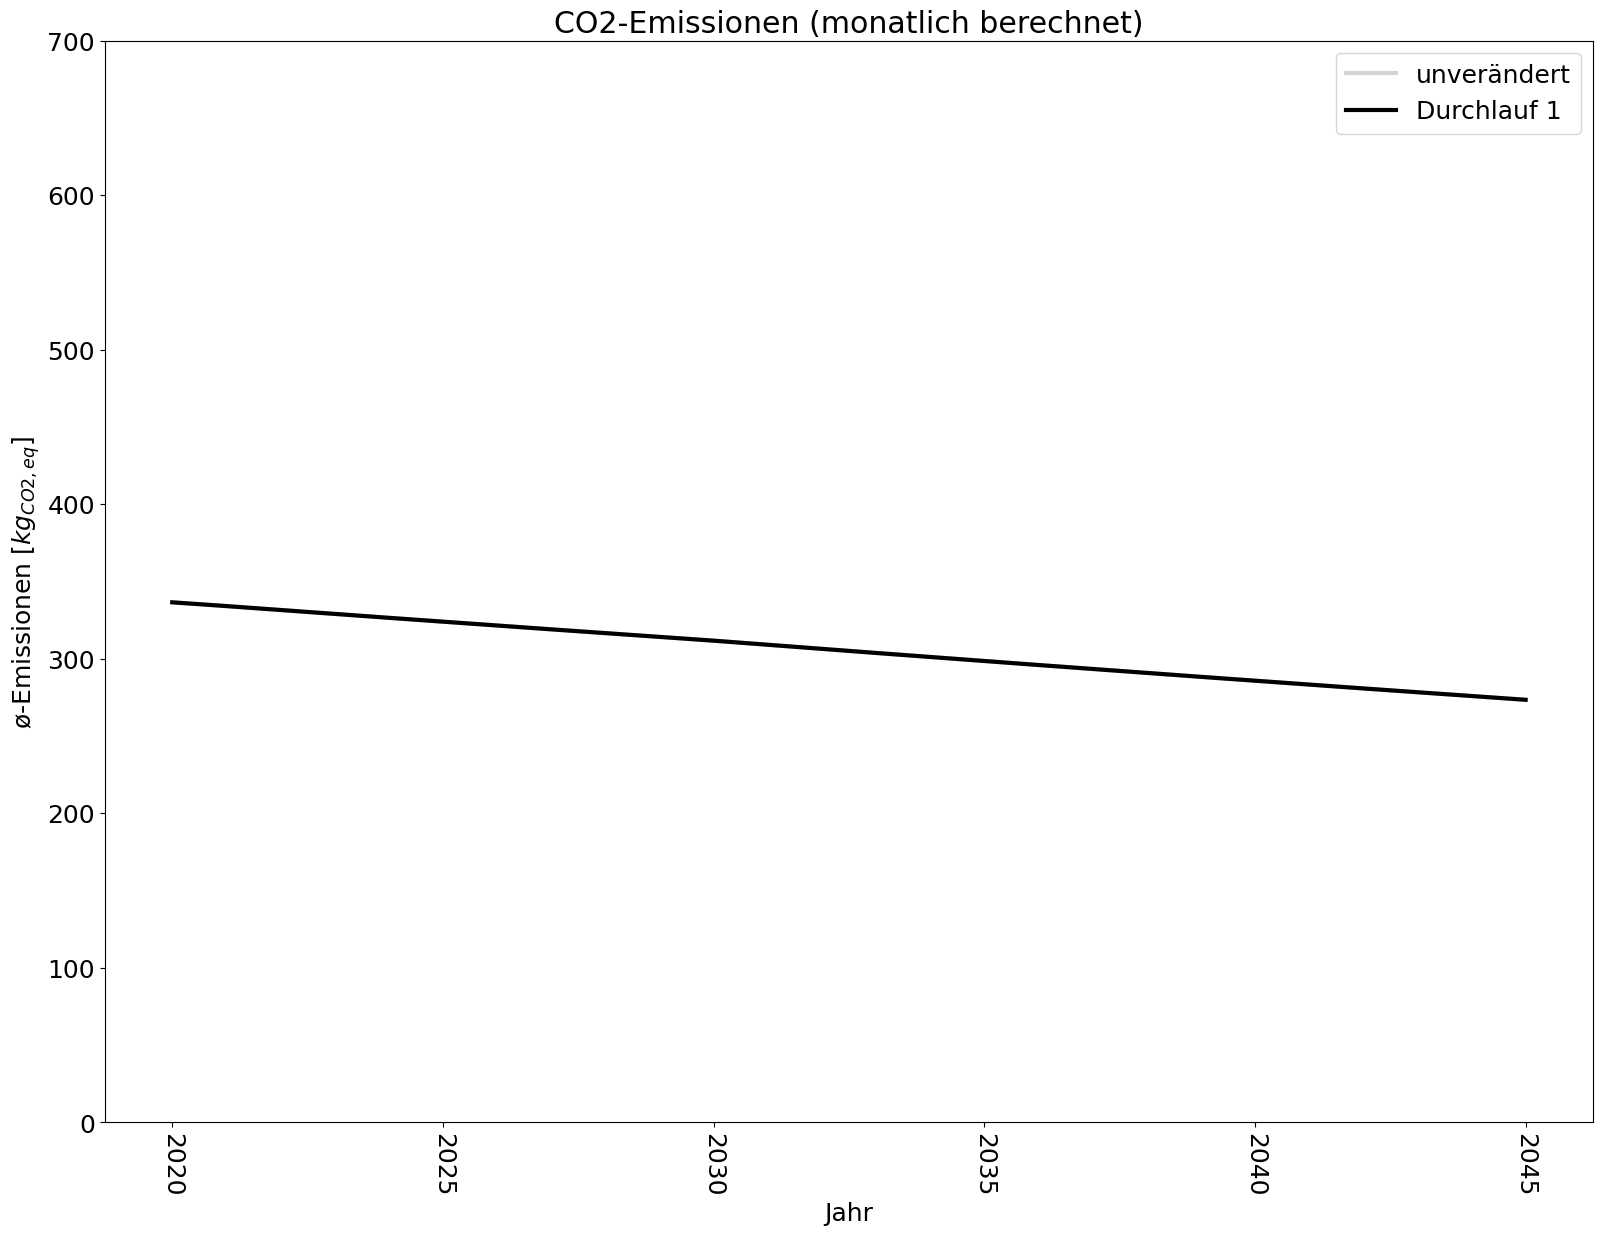

<Figure size 1600x1200 with 0 Axes>

In [21]:
importlib.reload(graphs)
selected_buildings = session.buildings.df[session.buildings.df['selected'] == True]
output_folders = [session.simulation.reference_data_folder]
for folder in output_folders:
    for idx in selected_buildings.index:

        # export emissions graph:
        graphs.export_individual_graph(
            csv_name="/emissions/CO2_emissions_{0}.csv".format(
                idx),
            data_folders=[folder],
            columns=['building_household_emissions'],
            title_="CO2-Emissionen (monatlich berechnet)",
            outfile=os.getcwd() +
            "/CO2_emissions_{0}.png".format(idx),
            xlabel_="Jahr",
            ylabel_="ø-Emissionen [$kg_{CO2,eq}$]",
            x_='current_date',
            convert_grams_to_kg=True,
            compare_data_folder=session.simulation.reference_data_folder,
            figtext=
                str(idx) + " "
                + str(selected_buildings.loc[idx, 'address']) + " "
                + str(selected_buildings.loc[idx, 'type'])
                + "\nø-spez. Wärmeverbrauch: "
                + str(selected_buildings.loc[idx, 'avg_spec_heat_consumption'])
                + ", ø-spez. Stromverbrauch: "
                + str(selected_buildings.loc[idx, 'avg_spec_heat_consumption'])
                if session.VERBOSE_MODE else "",
            figsize=(16,12),  # inches
            ylim = (0, 700)
        )

        graphs.export_individual_graph(
            csv_name="/energy_prices/energy_prices_{0}.csv".format(
                idx),
            data_folders=[folder],
            columns=['building_household_expenses_heat',
                        'building_household_expenses_power'],
            labels_=['Wärmekosten', 'Stromkosten'],
            outfile=os.getcwd() +
            "/energy_prices_{0}.png".format(idx),
            title_="Energiekosten",
            xlabel_="Jahr",
            ylabel_="€/Monat",
            x_='current_date',
            compare_data_folder=session.simulation.reference_data_folder,
            figtext=
                str(idx) + " "
                + str(selected_buildings.loc[idx, 'address']) + " "
                + str(selected_buildings.loc[idx, 'type'])
                + "\nø-spez. Wärmeverbrauch: "
                + str(selected_buildings.loc[idx, 'avg_spec_heat_consumption'])
                + ", ø-spez. Stromverbrauch: "
                + str(selected_buildings.loc[idx, 'avg_spec_heat_consumption'])
                if session.VERBOSE_MODE else "",
            figsize=(16,12),  # inches
            ylim=(0, 300)
        )

In [ ]:

# export energy prices graph:
# importlib.reload(graphs)
# session.simulation.output_folders = ["/home/dunland/github/qScope/data/outputs/output_20221025_13-56-59", "/home/dunland/github/qScope/data/outputs/output_20221025_14-08-17"] 
for group_df in session.buildings.list_from_groups():
    if group_df is not None:
        for idx in group_df.index:
            graphs.export_individual_graph(
                csv_name="/energy_prices/energy_prices_{0}.csv".format(
                    idx),
                data_folders=["/home/dunland/github/qScope/data/outputs/output_test"],
                columns=['building_household_expenses_heat',
                            'building_household_expenses_power'],
                labels_=['Wärmekosten', 'Stromkosten'],
                outfile=None,
                title_="Energiekosten",
                xlabel_="Jahr",
                ylabel_="€/Monat",
                x_='current_date',
                compare_data_folder=session.simulation.reference_data_folder,
                figtext=
                    str(idx) + " "
                    + str(group_df.loc[idx, 'address']) + " "
                    + str(group_df.loc[idx, 'type'])
                    + "\nø-spez. Wärmeverbrauch: "
                    + str(group_df.loc[idx, 'avg_spec_heat_consumption'])
                    + ", ø-spez. Stromverbrauch: "
                    + str(group_df.loc[idx, 'avg_spec_heat_consumption'])
                    if session.VERBOSE_MODE else "",
                figsize=(16,12)  # inches
            )

In [ ]:
importlib.reload(session)
# create graphs from precomputed reference data
for idx in session.buildings.df.index:
    graphs.export_default_graph(
        csv_name="/energy_prices/energy_prices_{0}.csv".format(
            idx),
        data_folders=[session.simulation.reference_data_folder],
        csv_columns=['building_household_expenses_heat',
                    'building_household_expenses_power'],
        labels_=['Wärmekosten', 'Stromkosten'],
        outfile=session.simulation.reference_data_folder + "/energy_prices/",
        title_="Energiekosten",
        xlabel_="Jahr",
        ylabel_="€/Monat",
        x_='current_date',
        # compare_data_folder=session.simulation.current_output_folder + "/../../precomputed/simulation_defaults",
        figsize=(16,12),  # inches
        overwrite_color='lightgray'
    )

2.0


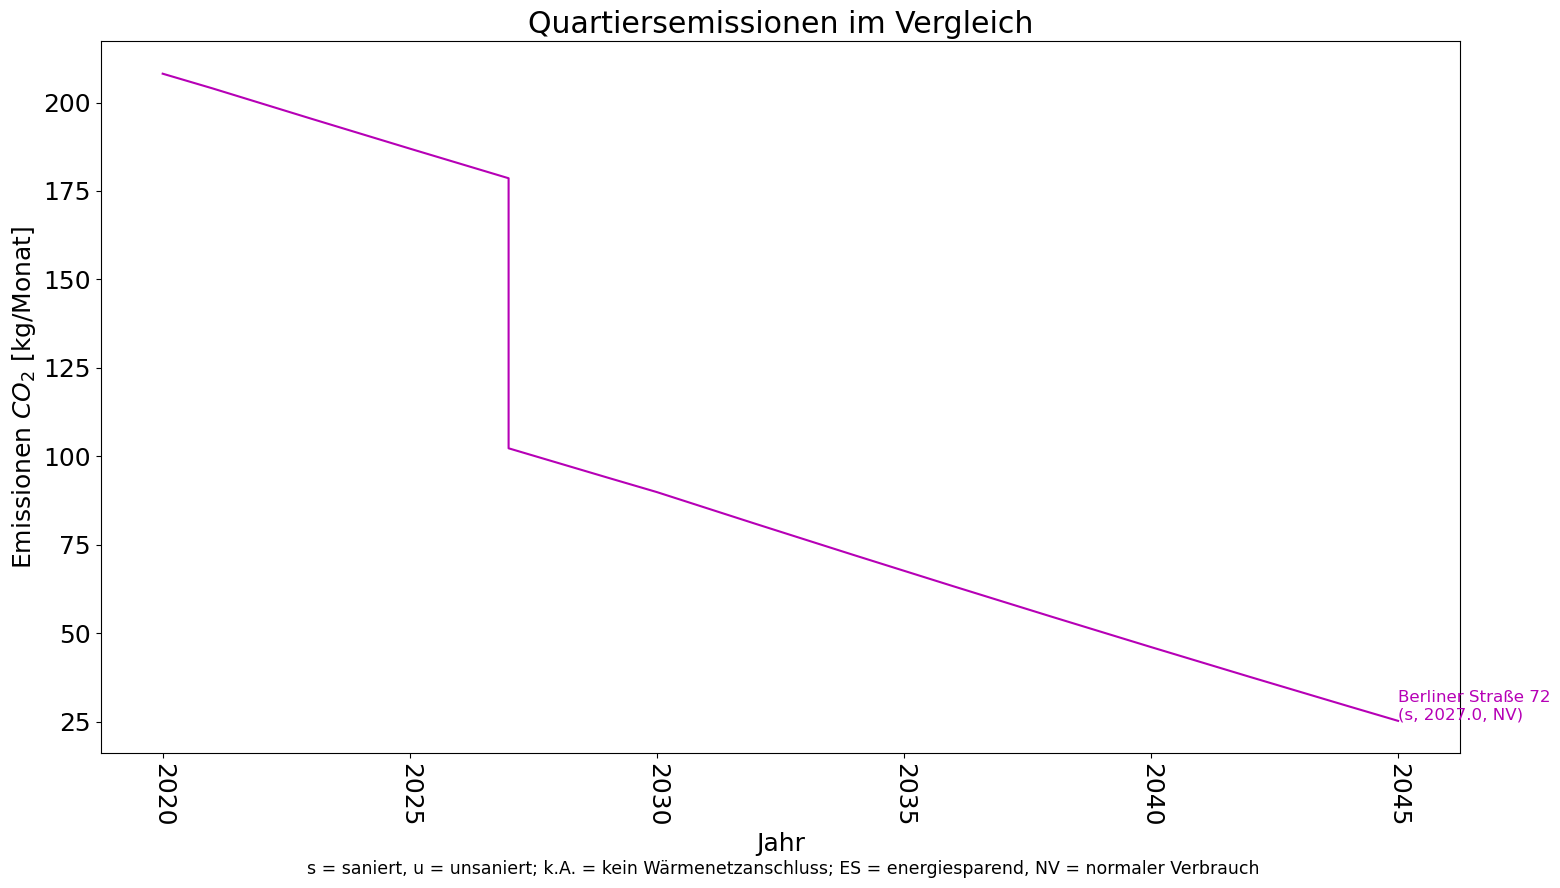

In [13]:
importlib.reload(graphs)

devtools.select_buildings_for_simulation(session.buildings.df, ['1.02'], connection_to_heat_grid=2027, refurbished=True)

session.buildings.df.at['1.02', 'group'] = 2
print(session.buildings.df.loc['1.02', 'group'])

current_output_folder = "/home/dunland/github/qScope/data/outputs/output_test"
graphs.export_compared_emissions(
            session.buildings.list_from_groups(),
            current_output_folder,
            current_output_folder + "/emissions/CO2_emissions_groups.png"
            )